One Class Horizontal Translation. 2 Dimensional data.
100 batches of 152 instances



METHOD: Static lp as classifier
Execution time:  0.7178636176341263
Average MCC:  0.923636795494
Average error: 3.9217
Average macro-F1: 0.9600316900901729
Average micro-F1: 0.9604
Average Accuracy:  96.0783
Standard Deviation:  1.422898489
Variance:  2.02464011


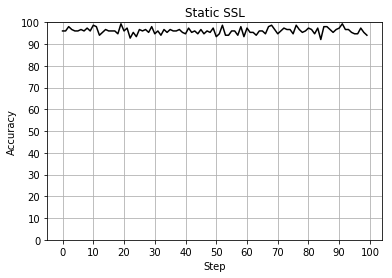

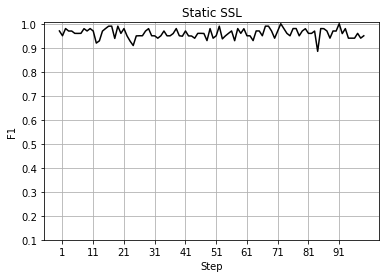

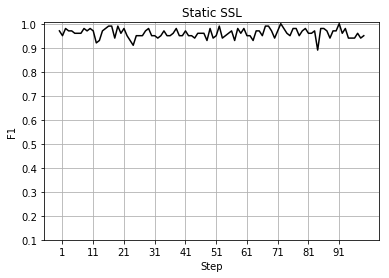




METHOD: Sliding lp as classifier
Execution time:  0.39810828716709645
Average MCC:  0.990237348773
Average error: 0.4277
Average macro-F1: 0.9950830158637624
Average micro-F1: 0.9950999999999999
Average Accuracy:  99.5723
Standard Deviation:  1.29370541856
Variance:  1.67367371


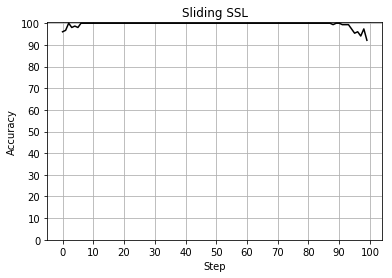

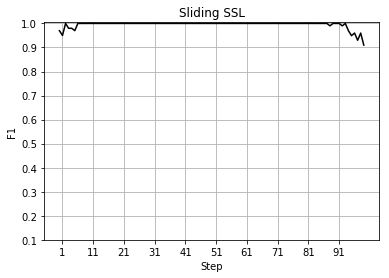

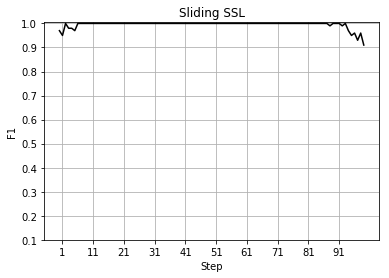




METHOD: Incremental lp as classifier
Execution time:  4.185702247623803
Average MCC:  0.938557800635
Average error: 3.1977
Average macro-F1: 0.9681336244293905
Average micro-F1: 0.9684
Average Accuracy:  96.8023
Standard Deviation:  1.42041392207
Variance:  2.01757571


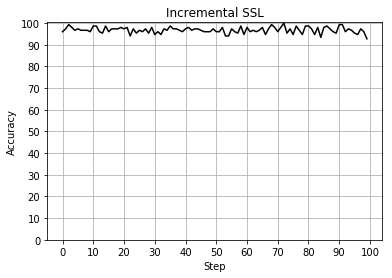

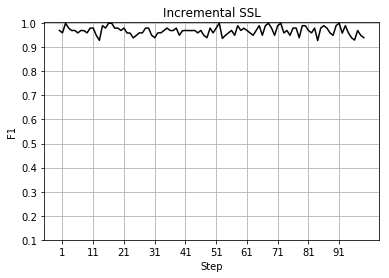

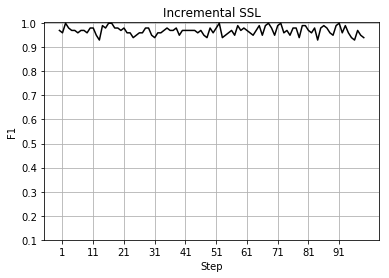




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  0.4319397799744076
Average MCC:  0.992866963125
Average error: 0.3225
Average macro-F1: 0.9963907740331652
Average micro-F1: 0.9963999999999998
Average Accuracy:  99.6775
Standard Deviation:  0.964686866294
Variance:  0.93062075


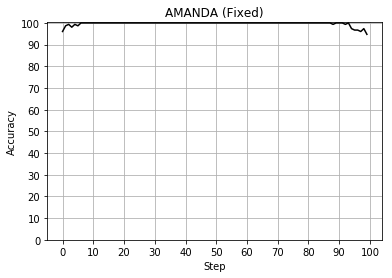

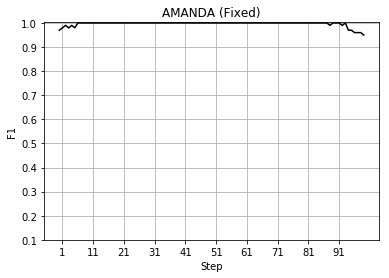

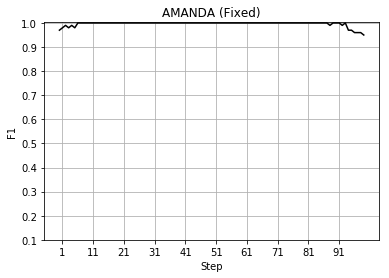




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  0.5139454759721573
Average MCC:  0.991277286511
Average error: 0.3817
Average macro-F1: 0.9955801009861367
Average micro-F1: 0.9956000000000002
Average Accuracy:  99.6183
Standard Deviation:  1.10965855559
Variance:  1.23134211


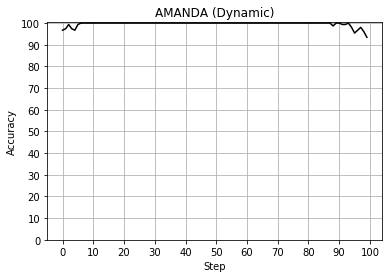

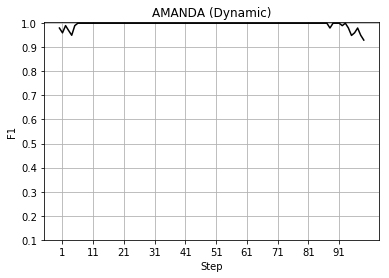

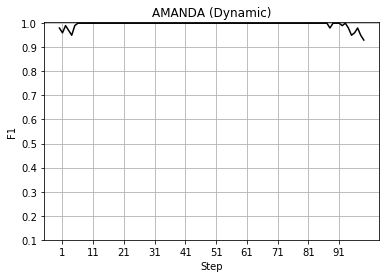




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  17.335166287341714
Average MCC:  0.992104548524
Average error: 0.3621
Average macro-F1: 0.9959799780796875
Average micro-F1: 0.996
Average Accuracy:  99.6379
Standard Deviation:  0.986845778225
Variance:  0.97386459


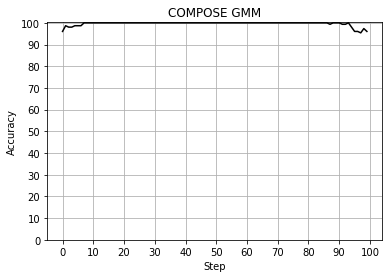

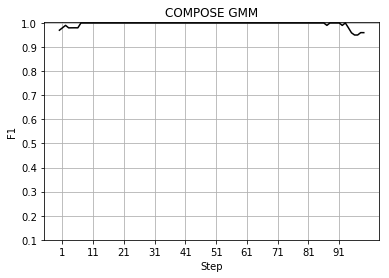

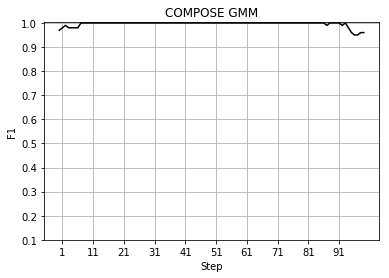




Method: Level IW
Execution time:  17.335166287341714
Average MCC:  -0.00354189872723
Average macro-F1: 0.4959846019909023
Average micro-F1: 0.49809999999999993
Average Accuracy:  99.60526
Standard Deviation:  1.07702871772
Variance:  1.1599908588


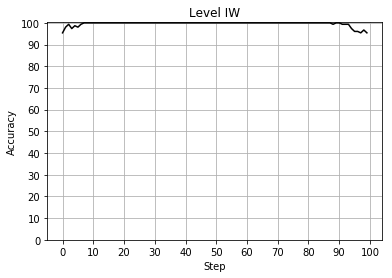

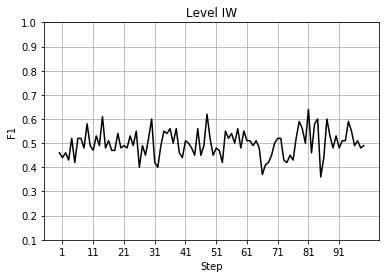

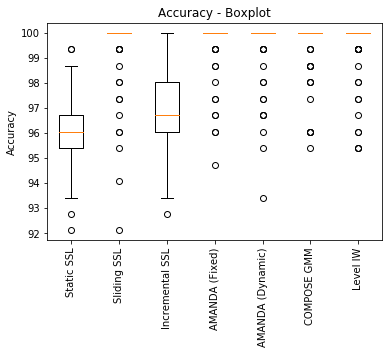

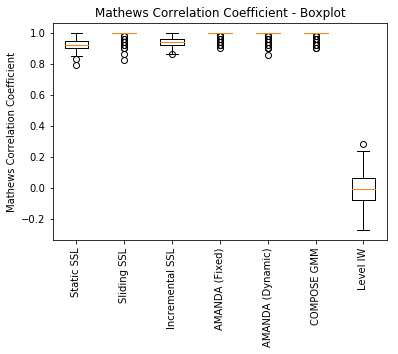

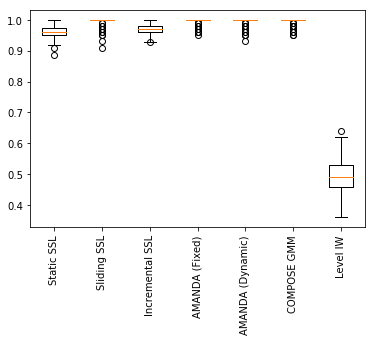

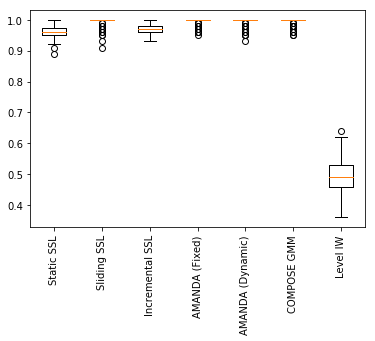

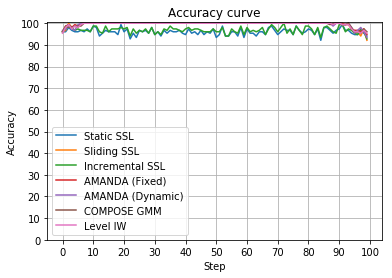

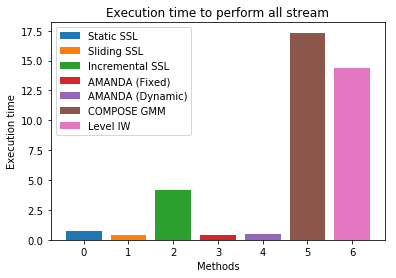

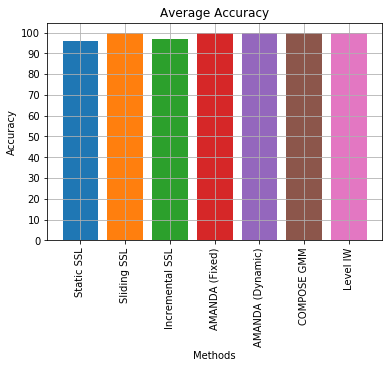

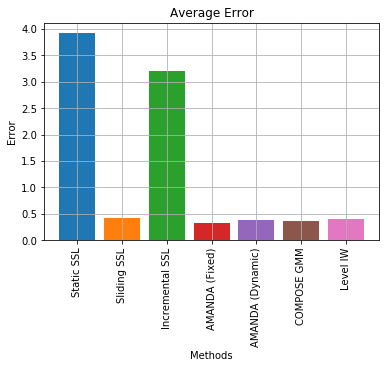

Error reduction: 3.63661721742
Error reduction: 0.753552050775
Error reduction: 3.74611124468
Error reduction: 3.6844948339
Error reduction: 3.70489486179
Error reduction: 3.67092257045


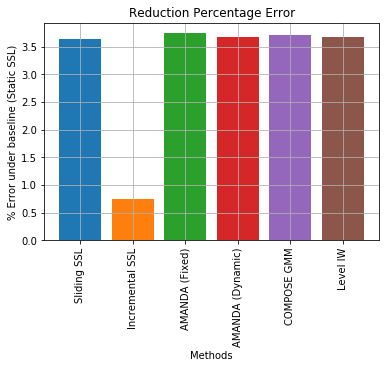

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCHT(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 5, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 5, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 5, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 5, 0.8, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 2, None, "kde", clfName=sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CHT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()